# Wealth Concentration and Our Health-

## The Data Story in Charles Dickens *The Tale of Two Cities*

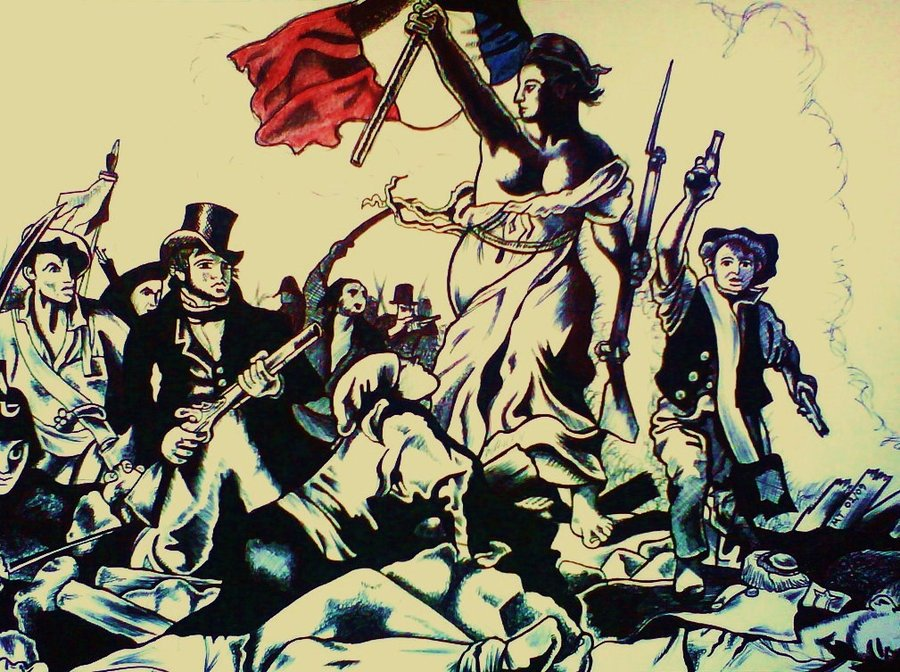

## Social Reform and Inequality in Europe
Charles Dickens' A Tale of Two Cities is a story that shows two different responses to wealth inequality and the need for reform around the turn of the 19th century. The french revolution represented a violent repsonse to the concentration of wealth in the elite class, while the British political reform movement focused on policy change culminating in the Reform Act of 1832. Each country during this timbritish refrome had a different framework for addressing the need for reform, the new enlightnemnet ideals of democratic government, and the wealth inequality that led to miserable living conditions for the non elites. While the French had pursued violence, the British pursued policy change and the expansion of democratic powers. Dickens highlights lower wealth inequality as one of the factors that led Britian to choose a different path. 

The OECD is an organization fo countries that colloqially denotes advanced economies that share many similar metrics on a wide section of their country. The OECD website allows for downloads of many different ecoenomic measures by country, one of which is a commonly understood measure of economic inequality. The Gini coefficient has been a long time marker for how economically equitable the economy is in relation to other economies. Using this story as a way to understand wealth inequality and the motivation it creates for change, use the OECD datasets to compare different countries on measures of wealth concentration.

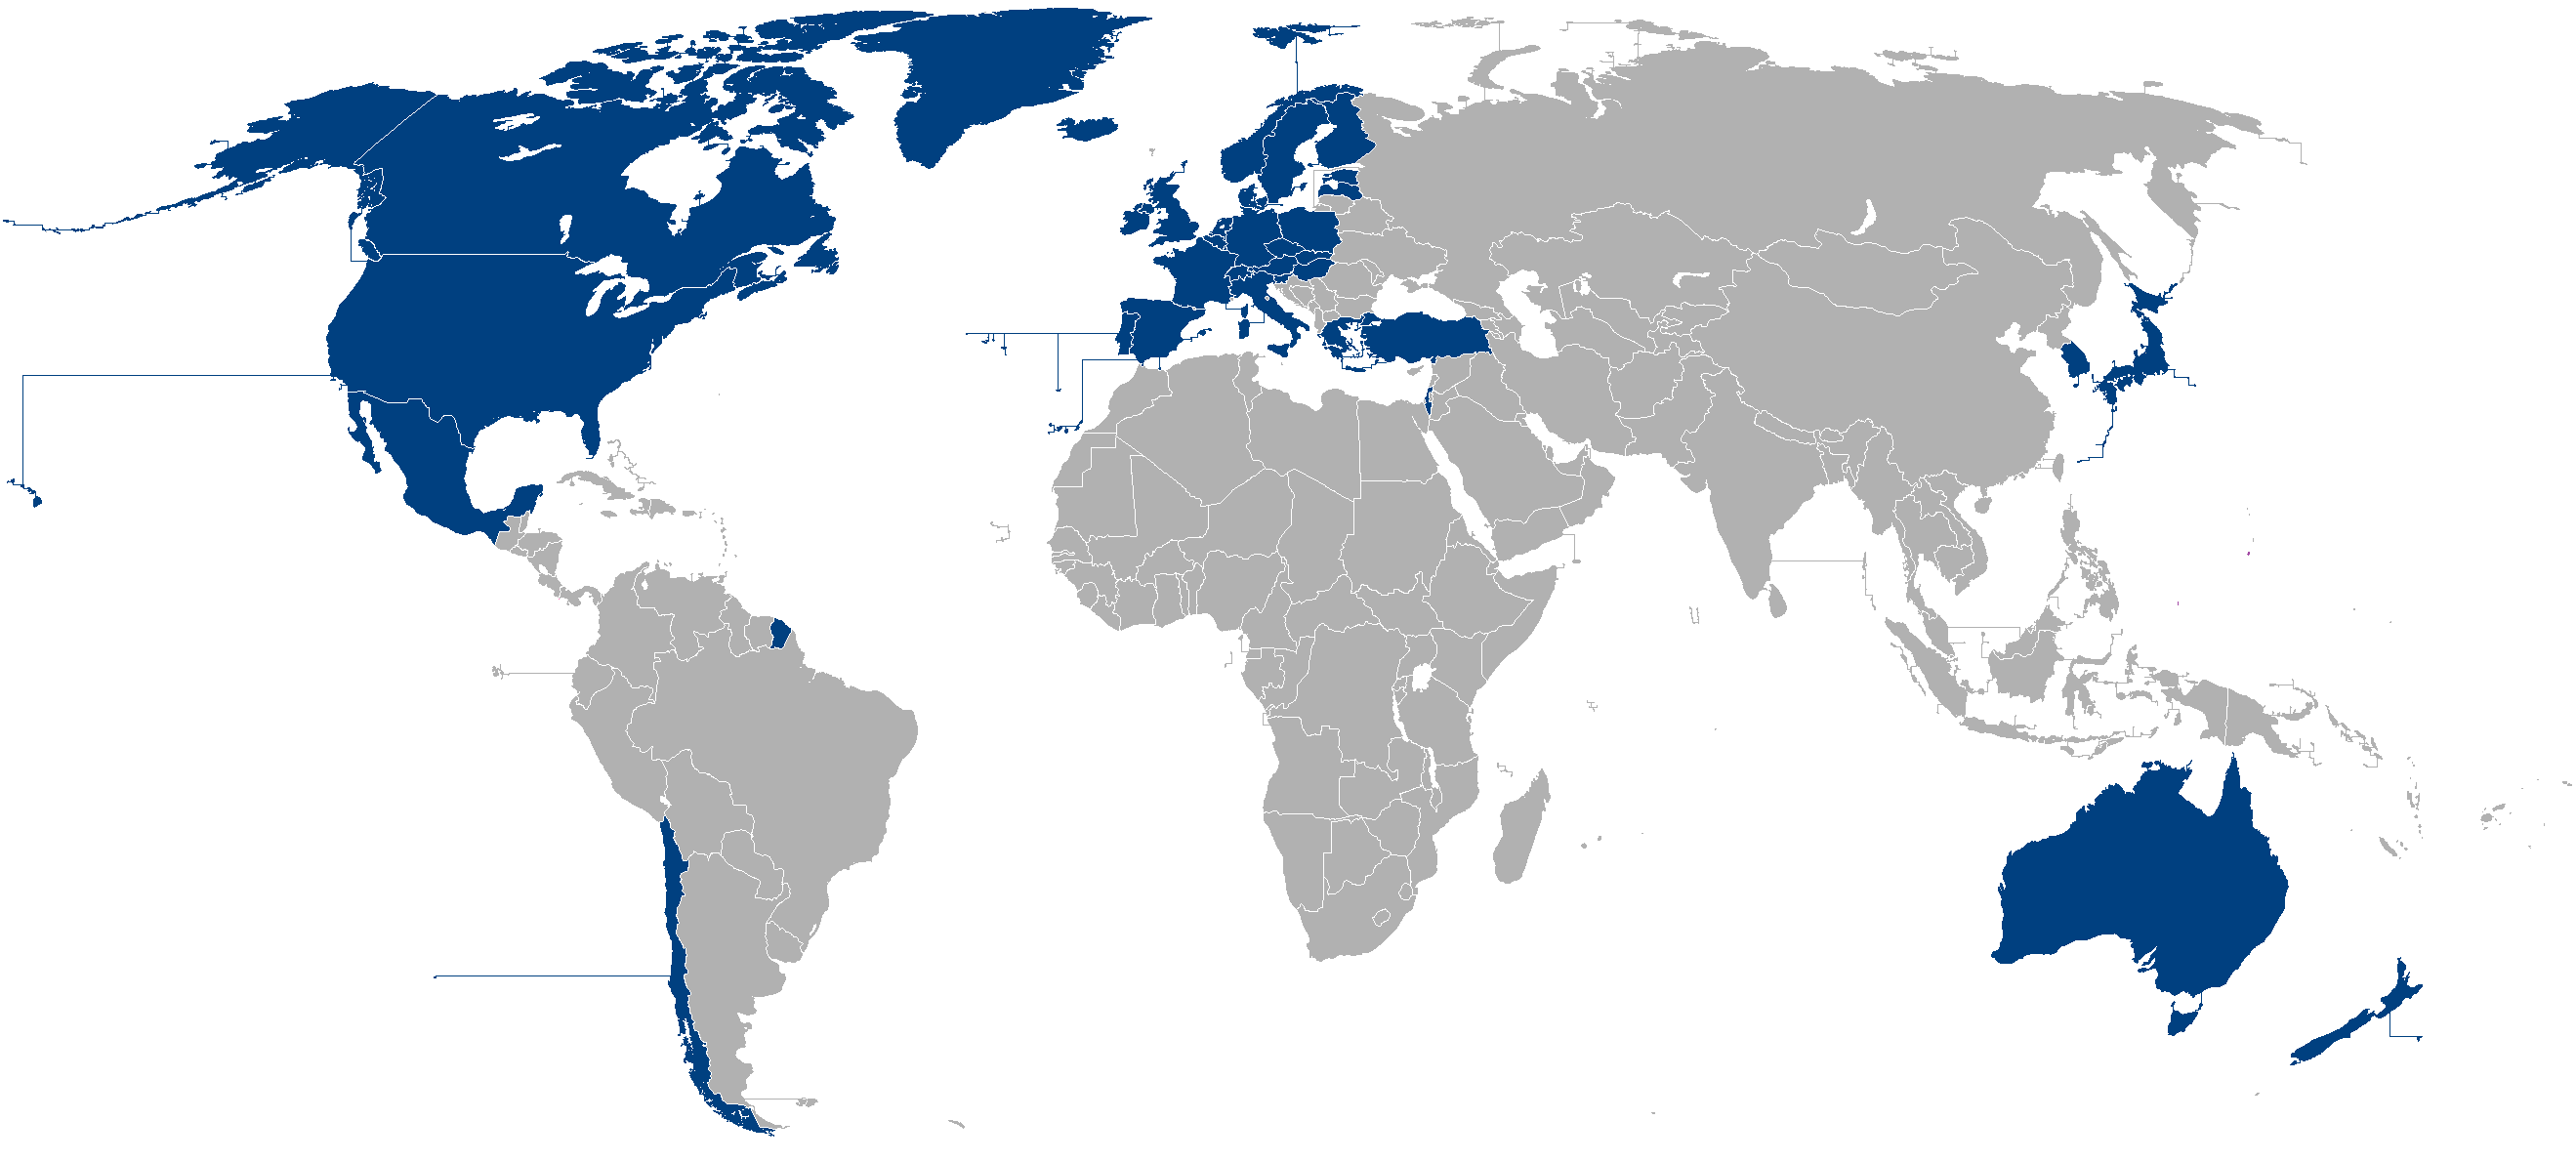

#### Prep Code
This is the same general first step in almost any code script. Here you will import all the libraries you will use, set your working directory, and import the staged datasets from your repository.

In [1]:
#### Prep code

import os
import pandas as pd
import numpy as np
import scipy.stats as st

os.chdir("E:/DataStories")

oecd = pd.read_csv("_data/wealth_oecd_stage.csv")
oecd.info()

health = pd.read_csv("_data/wealth_health_stage.csv", encoding = "ISO-8859-1")
health.info()

KeyboardInterrupt: 

In [13]:
#### Susbet by column string value

str = oecd[oecd["Subject"].str.contains("Gini")]
str.head()

,Subject,Country,Year,Unit,Power,Value
262,Income inequality: Gini (at disposable income;...,Australia,2012,0-1 scale,Units,0.326
263,Income inequality: Gini (at disposable income;...,Australia,2014,0-1 scale,Units,0.337
876,Income inequality: Gini (at disposable income;...,Austria,2011,0-1 scale,Units,0.281
877,Income inequality: Gini (at disposable income;...,Austria,2012,0-1 scale,Units,0.275
878,Income inequality: Gini (at disposable income;...,Austria,2013,0-1 scale,Units,0.279


In [14]:
#### Convert from Long to Wide

wide = str.pivot_table(index = "Country", columns = "Year", values = "Value")
wide.head()

Year,2011,2012,2013,2014,2015
Country,,,,,
Australia,NaN,0.326,NaN,0.337,NaN
Austria,0.281,0.275,0.279,0.274,0.276
Belgium,0.270,0.265,0.265,0.266,0.268
Brazil,0.483,NaN,0.470,NaN,NaN
Canada,0.313,0.317,0.320,0.313,0.318


In [15]:
#### Reset Index

index = wide.reset_index("Country")
index.head()

Year,Country,2011,2012,2013,2014,2015
0,Australia,NaN,0.326,NaN,0.337,NaN
1,Austria,0.281,0.275,0.279,0.274,0.276
2,Belgium,0.270,0.265,0.265,0.266,0.268
3,Brazil,0.483,NaN,0.470,NaN,NaN
4,Canada,0.313,0.317,0.320,0.313,0.318


In [16]:
#### Create Column for Mean Value in Column

index["Avg"] = index.mean(axis = 1)
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
Country    42 non-null object
2011       31 non-null float64
2012       31 non-null float64
2013       31 non-null float64
2014       33 non-null float64
2015       34 non-null float64
Avg        42 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.4+ KB


In [19]:
#### Sort by column value

fil = index.filter(["Avg", "Country"])
gini = fil.sort_values(by = ["Avg"])
print(gini)

Year       Avg                       Country
16    0.249400                       Iceland
34    0.249600                      Slovenia
9     0.254600                       Denmark
33    0.255600               Slovak Republic
29    0.256800                        Norway
8     0.256800                Czech Republic
11    0.260600                       Finland
2     0.266800                       Belgium
37    0.273333                        Sweden
1     0.277000                       Austria
15    0.288500                       Hungary
13    0.290800                       Germany
27    0.291000                   Netherlands
38    0.292400                   Switzerland
12    0.296000                        France
30    0.297400                        Poland
18    0.304000                       Ireland
25    0.306000                    Luxembourg
4     0.316200                        Canada
20    0.328200                         Italy
0     0.331500                     Australia
21    0.33

#### Discussion
1. What do you notice in the list sorted by Gini coefficient?
2. What countires suprise you? What countries did you expect?
3. What would be the upside and downside of using one measure to calculate wealht concentration?

### Data for France and UK
Using the above list, create a graph that compares contemporary inequality in France andf UK.

In [20]:
#### Subset Data for Selected Column Value

fr = gini[gini["Country"] == "France"]
uk = gini[gini["Country"] == "United Kingdom"]
med = gini["Avg"].median()

In [2]:
#### Create bar chart with Matplotlib

plt.bar(1, fr["Avg"], color = "blue")
plt.bar(2, uk["Avg"], color = "red")
plt.bar(3, med, color = "grey")
plt.ylabel("Gini Coefficient")
plt.tick_params(bottom = False, labelbottom = False)
plt.ylim(bottom = 0.2, top = 0.4)
plt.legend(["France", "UK", "OECD Median"])
plt.title("Inequality Measure Average 2011-2015")
plt.savefig("wealth_fruk_bar.jpeg")

NameError: name 'plt' is not defined

#### Discussion
1. What does this plot show?
2. In comparison to France and UK in the late 18th century, what may be different about their economy in the conemporary context?
3. What historical elements and major policy transitions may have led to this transiton?

### Wealth Inequality and Health Outcomes

In many Western coutnries, it was historically understood that if you remianed healtheir you would be more likely to have economic success and that wealth is the outcome of health. However, there has been a significant shift to understand health outcomes as the product of wealth. Higher incomes and access to wealth leads to great access for healthcare and lower exposures to environments that make it harder to make healthy decisions. Read Dr. Marmot's article on the "Health Gap" for the following section. 

[The Health Gap](_doc/wealth_marmot_doc.pdf)

Using the same OECD web data portal, health data is collected in a smiliar format. By joining the two datasets we can assess the impact of economics on measured health outcomes.

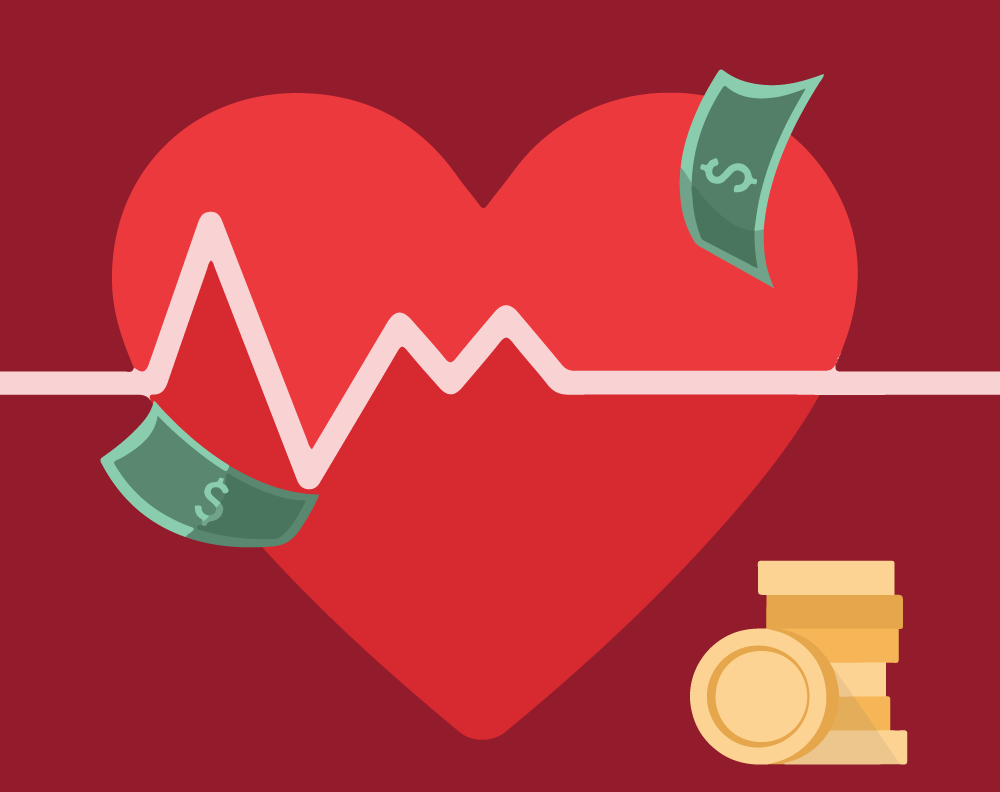

In [9]:
#### Convert from long to wide

hlth = health.pivot_table(index = "Country", columns = "Variable", values = "Value")
wlth = oecd.pivot_table(index = "Country", columns = "Subject", values = "Value")

In [10]:
#### Inner join datasets

merge = pd.merge(hlth, wlth, on = "Country", how = "inner")
merge.head()

,Accidental falls,Accidental poisoning,Accidents,Acquired immunodeficiency syndrome (AIDS),Acute myocardial infarction,Alcohol use disorders,All causes of death,Alzheimer's disease,Assault,Asthma,...,Value added in distributive trade; repairs; transport; accommodation and food services activities,Value added in financial and insurance activities,Value added in industry; including energy,Value added in other services activities,Value added in professional; scientific; technical; administration and support services activities,Value added in public administration; defence; education human health and social work activities,Value added in real estate activities,Water abstractions per capita,YouthsÂ whoÂ areÂ notÂ inÂ educationÂ norÂ inÂ employment: aged between 15 and 19,YouthsÂ whoÂ areÂ notÂ inÂ educationÂ norÂ inÂ employment: aged between 20 and 24
Country,,,,,,,,,,,,,,,,,,,,,
Australia,371.921429,229.536905,1178.277381,52.566667,1538.635714,46.702381,26399.807143,568.814286,53.553571,73.428571,...,16.777552,8.818786,17.736175,8.818786,10.464049,17.492712,11.953384,757.233980,7.217288,13.246034
Austria,161.697917,6.297917,508.234375,38.075000,893.159375,94.481250,14723.769792,185.121875,11.193750,13.211458,...,23.143273,4.440274,22.187551,4.440274,9.293064,17.410517,9.488616,NaN,7.230142,12.008261
Belgium,269.854762,47.865476,825.967857,53.566667,851.726190,78.877381,19434.053571,425.704762,30.133333,23.146429,...,19.872724,6.154252,16.803613,6.154252,13.426475,22.336531,8.661127,464.070967,5.390864,18.854977
Brazil,2040.498611,162.850000,12308.712500,NaN,14364.105556,1141.604167,202432.075000,2312.137500,9574.500000,399.038889,...,20.155797,6.454513,18.661691,6.454513,7.915732,19.967487,9.069024,406.724600,15.684669,23.968739
Canada,765.744444,355.080556,2027.831944,117.450000,2419.331944,137.344444,43181.237500,1078.272222,92.668056,43.327778,...,17.002943,7.062797,20.754407,7.062797,7.608580,19.811031,11.636686,991.018450,7.074110,14.758910


In [11]:
#### Drop all columns except for selected

life = merge.filter(["Total population at birth"])
life = life.reset_index()
life.head()

,Country,Total population at birth
0,Australia,82.2625
1,Austria,81.2875
2,Belgium,80.9750
3,Brazil,74.8625
4,Canada,81.6625


In [22]:
#### Inner join datasets

lg = pd.merge(life, gini, on = "Country", how = "inner")
lg["LifeExpectancy"] = lg["Total population at birth"]
lg["Gini"] = lg["Avg"]
final = lg.drop(columns = ["Total population at birth", "Avg"])
final.head()

,Country,LifeExpectancy,Gini
0,Australia,82.2625,0.3315
1,Austria,81.2875,0.2770
2,Belgium,80.9750,0.2668
3,Brazil,74.8625,0.4765
4,Canada,81.6625,0.3162


Text(0.5, 1.0, 'Life Expectancy and Income Inequality among OECD Countries')

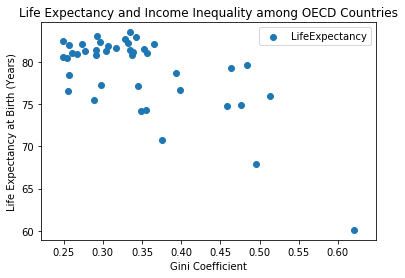

In [24]:
#### Create scatterplot with Matplotlib

plt.scatter(final.Gini, final.LifeExpectancy)
plt.xlabel("Gini Coefficient")
plt.ylabel("Life Expectancy at Birth (Years)")
plt.legend()
plt.title("Life Expectancy and Income Inequality among OECD Countries")

#### Conduct Linear regression

In [3]:
#### Conduct linear regression with Scipy

x = np.array(final["Gini"]).reshape((-1, 1))
y = np.array(final["LifeExpectancy"]).reshape((-1, 1))

spearman = spearmanr(x, y)
print("Rsq =", (spearman[0]), "P-Value =", (spearman[1]))

NameError: name 'np' is not defined

#### Discussion
1. What does this statistical anaylsis indicate?
2. How would you describe the impact of income inequality and life expectancy?
3. Where does this statistical relationship come from? How could one effect the other?

## How data can help us understand the effects of inequality

#### Gini Coefficient Data in France and UK

While the violence of the French revolution was indiciative of the ineqaulity during the time of the novel, over time France and England have diverged in one significant measure for how much wealth is controlled by the elites. It is possible that recent developments in French and British politics (Brexit) indictae that more inequality relates to a different type of political instability. 

#### Life Expectancy and Wealth Inequality.

Under old assumptions, more health led to higher wealth due to less time and resources spent on being sick. However, among OECD countries more inequality leads to lower life expenctancy. This indicates that more economic equality within a certain level of development may lead to better health outcomes. 

It is possible that ther emay be confoundign elements or other items that are necessary to control. These associations could be the products of more specific correlations that are unrelated when analyzed in a more precise way.

#### Discussion

1. What other economic and health measures would you look at in order to find a more robust or precise analysis of the connection of economic inequaliy and health outcomes?
2. Does this analysis change your perspective on public health policy? Do you think this confirms or denies some of your original thinking on the subject of publci health impacts from economcis?
3. If you were to compose a novel like Dicken's Tale of Two Cities now, what two cities would you include? What crisis would you highlight? What position on the effect of inequality would you take?

## Wealth Inequality in Gainesville, FL

Using data downloaded from FloridaCharts (one of the best and most easy to use Public health data websites for the state), compare social charatceristics and mortality data for census tracts inside Gainesville. 

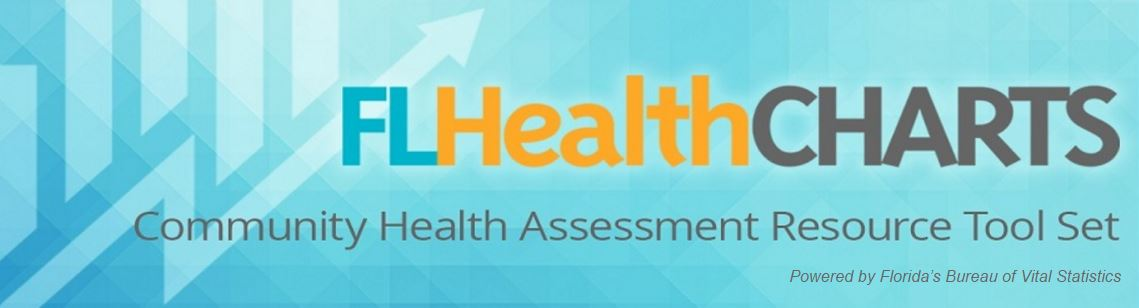

#### [Answer](#answer_key)

******
******
******
******
******
******
******
******
******
******
******
******
******
******

### <a id='answer_key'> Answer </a>

In [58]:
#### Prep code

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir("C:/Users/andrewcistola/GitHub/DataStories")

hlth = pd.read_csv("_data/wealth_gnv_health_stage.csv", encoding = "ISO-8859-1")
hlth.info()

wlth = pd.read_csv("_data/wealth_gnv_income_stage.csv", encoding = "ISO-8859-1")
wlth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
Tract             56 non-null float64
Mortality Rate    56 non-null float64
dtypes: float64(2)
memory usage: 976.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 152 entries, Tract to Vacant housing units (%)
dtypes: float64(135), object(17)
memory usage: 66.6+ KB


In [47]:
#### Join by column

merge = pd.merge(wlth, hlth, on = "Tract", how = "inner")
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Columns: 153 entries, Tract to Mortality Rate
dtypes: float64(136), object(17)
memory usage: 67.4+ KB


In [48]:
#### Rename selected columns

merge["Income"] = merge["  Median household income (dollars)"]
merge["Mortality"] = merge["Mortality Rate"]
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Columns: 155 entries, Tract to Mortality
dtypes: float64(138), object(17)
memory usage: 68.2+ KB


In [49]:
#### Drop all but selected columns

filt = merge.filter(["Mortality", "Income", "Tract"])
filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 3 columns):
Mortality    56 non-null float64
Income       56 non-null float64
Tract        56 non-null float64
dtypes: float64(3)
memory usage: 1.8 KB


In [50]:
flch = filt
flch.head()

,Mortality,Income,Tract
0,300.5,16686.0,2.00
1,706.9,82583.0,18.05
2,620.1,96615.0,22.07
3,368.4,47571.0,14.00
4,1108.0,77578.0,17.02


Text(0.5, 1.0, 'Mortality Rate by Census Tract in Alachua County')

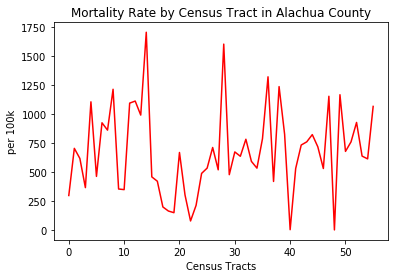

In [52]:
#### Create Line Graph with Matplotlib

plt.plot(flch.Mortality, color = "r")
plt.ylabel("per 100k")
plt.xlabel("Census Tracts")
plt.title("Mortality Rate by Census Tract in Alachua County")

Text(0.5, 1.0, 'Median Household Income by Census Tract in Alachua County')

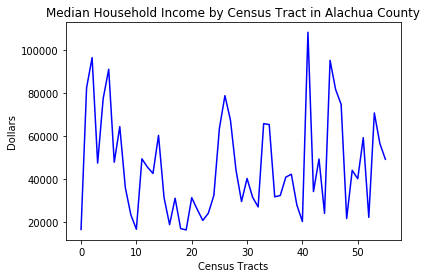

In [51]:
plt.plot(flch.Income, color = "b")
plt.ylabel("Dollars")
plt.xlabel("Census Tracts")
plt.title("Median Household Income by Census Tract in Alachua County")

In [1]:
#### Conduct linear regression with Scipy

x = np.array(flch["Income"]).reshape((-1, 1))
y = np.array(flch["Mortality"]).reshape((-1, 1))

spearman = st.spearmanr(x, y)
print("Rsq =", (spearman[0]), "P-Value =", (spearman[1]))

ModuleNotFoundError: No module named 'scipy'